In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


warnings.filterwarnings('ignore')
# Load previous datasets
stats = pd.read_csv("C:\\Users\\17667\\Desktop\\Python\\NYU Python course\\project\\NBA data\\stats\\stats2.csv")
stats.rename(columns={"PLAYER":"player",'TEAM':'team','AGE':'age'},inplace=True)
salary = pd.read_csv("C:\\Users\\17667\\Desktop\\Python\\NYU Python course\\project\\NBA data\\salary\\salary.csv")

# Merge the stats with salary, drop useless columns, round numbers
dataset = pd.merge(stats,salary,on =['player','season'] )
dataset.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis=1,inplace=True)
dataset['adjusted salary'] = round(dataset['adjusted salary'])
dataset.to_csv("C:\\Users\\17667\\Desktop\\Python\\NYU Python course\\project\\NBA data\\dataset.csv")

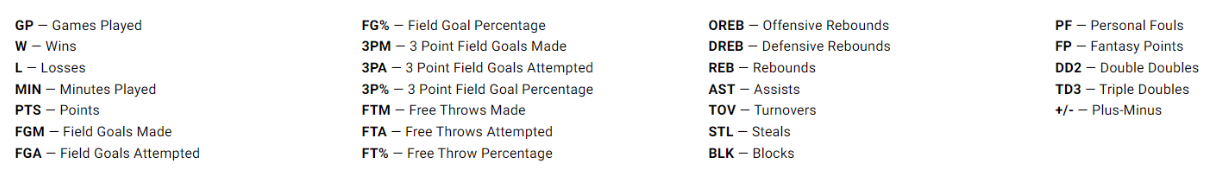

# Initial analysis of data structure

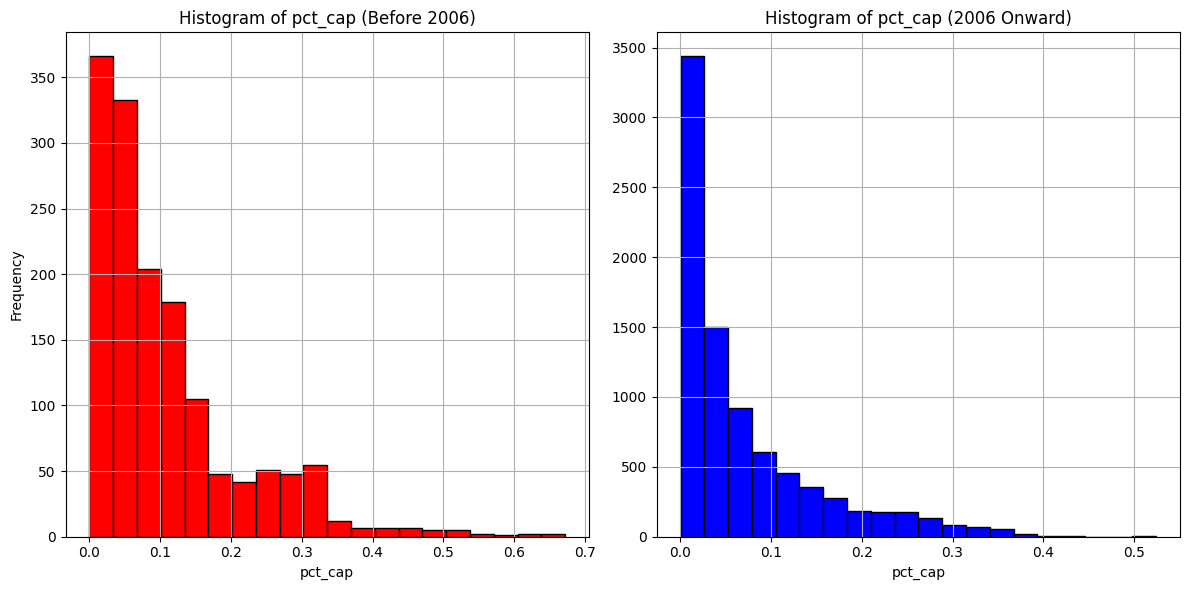

In [24]:
"""
Observe salary distribution before 2005 and after 2005
"""
# Splitting the dataset into two based on the year
data = dataset
data_before_2006 = data[data['season'] <= 2005]
data_2006_onward = data[data['season'] > 2005]

# Plotting histograms for both datasets
plt.figure(figsize=(12, 6))

# Histogram for data before and including 2005
plt.subplot(1, 2, 1)
plt.hist(data_before_2006['pct_cap'], bins=20, color='red', edgecolor='black')
plt.title('Histogram of pct_cap (Before 2006)')
plt.xlabel('pct_cap')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for data from 2006 onward
plt.subplot(1, 2, 2)
plt.hist(data_2006_onward['pct_cap'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of pct_cap (2006 Onward)')
plt.xlabel('pct_cap')
plt.grid(True)

plt.tight_layout()
plt.show()


In 2005, a new labor contract was signed into effect by the NBA and the player union, many major changes were implemented regarding player's salary composition, so the determinants have changed prior to 2005 and after 2005. 
For the consistency of the project, I have decided to only use the dataset containing seasons from 2006 onward.

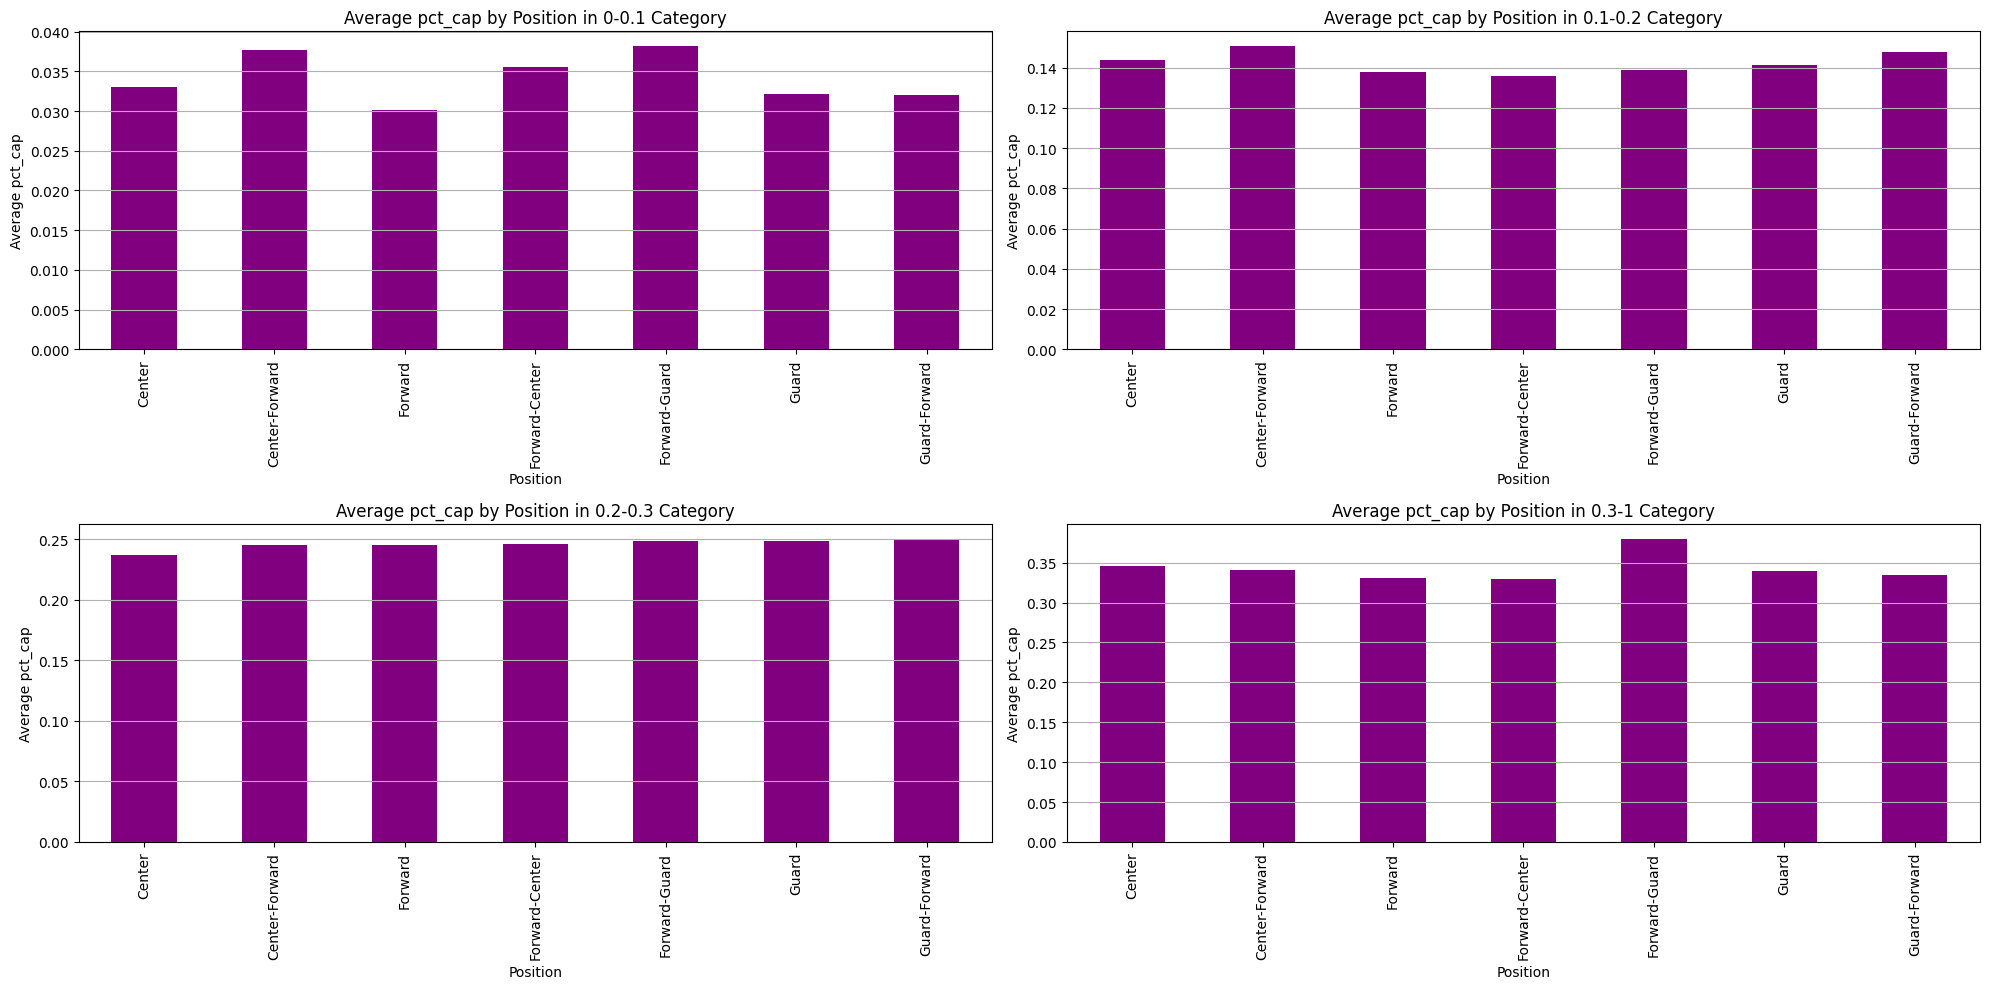

In [25]:
"""
Here I want to see if there are significant differences in pay for different pay group based on position.
"""
# Redefining the categories
categories = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-1']

# Categorizing players based on pct_cap
data_recent = data[data['season'] > 2005]
data_recent['pct_cap_category'] = pd.cut(data_recent['pct_cap'], bins=[0, 0.1, 0.2, 0.3, 1], labels=categories, right=False)

# Calculating the average pct_cap for each position in each category
avg_pct_cap_by_position = data_recent.groupby(['pct_cap_category', 'position'])['pct_cap'].mean().unstack()

# Plotting bar charts for each category
plt.figure(figsize=(20, 10))

for i, category in enumerate(categories, 1):
    plt.subplot(2, 2, i)
    avg_pct_cap_by_position.loc[category].plot(kind='bar', color='purple')
    plt.title(f'Average pct_cap by Position in {category} Category')
    plt.xlabel('Position')
    plt.ylabel('Average pct_cap')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()


It seems there aren't much difference.

In [26]:
data = dataset

# Filtering the dataset for years 2006 and onward
data_recent = data[data['season'] > 2005]

# Creating new columns as specified
data_recent['PPG'] = data_recent['PTS'] / data_recent['GP']  # Points Per Game
data_recent['FGAPG'] = data_recent['FGA'] / data_recent['GP']  # Field Goal Attempts Per Game
data_recent['3PAPG'] = data_recent['3PA'] / data_recent['GP']  # Three-Point Attempts Per Game
data_recent['REBPG'] = data_recent['REB'] / data_recent['GP']  # Rebounds Per Game
data_recent['ASTPG'] = data_recent['AST'] / data_recent['GP']  # Assists Per Game
data_recent['TOVPG'] = data_recent['TOV'] / data_recent['GP']  # Turnovers Per Game
data_recent['STLPG'] = data_recent['STL'] / data_recent['GP']  # Steals Per Game
data_recent['BLKPG'] = data_recent['BLK'] / data_recent['GP']  # Blocks Per Game

# Adding new attributes to the data_recent dataframe using MINS as the denominator
data_recent['PPM'] = data_recent['PTS'] / data_recent['MIN']  # Points Per Minute
data_recent['FGAPM'] = data_recent['FGA'] / data_recent['MIN']  # Field Goal Attempts Per Minute
data_recent['3PAPM'] = data_recent['3PA'] / data_recent['MIN']  # Three-Point Attempts Per Minute
data_recent['REBPM'] = data_recent['REB'] / data_recent['MIN']  # Rebounds Per Minute
data_recent['ASTPM'] = data_recent['AST'] / data_recent['MIN']  # Assists Per Minute
data_recent['TOVPM'] = data_recent['TOV'] / data_recent['MIN']  # Turnovers Per Minute
data_recent['STLPM'] = data_recent['STL'] / data_recent['MIN']  # Steals Per Minute
data_recent['BLKPM'] = data_recent['BLK'] / data_recent['MIN']  # Blocks Per Minute

data_recent.to_csv("C:\\Users\\17667\\Desktop\\Python\\NYU Python course\\project\\NBA data\\data_recent.csv")


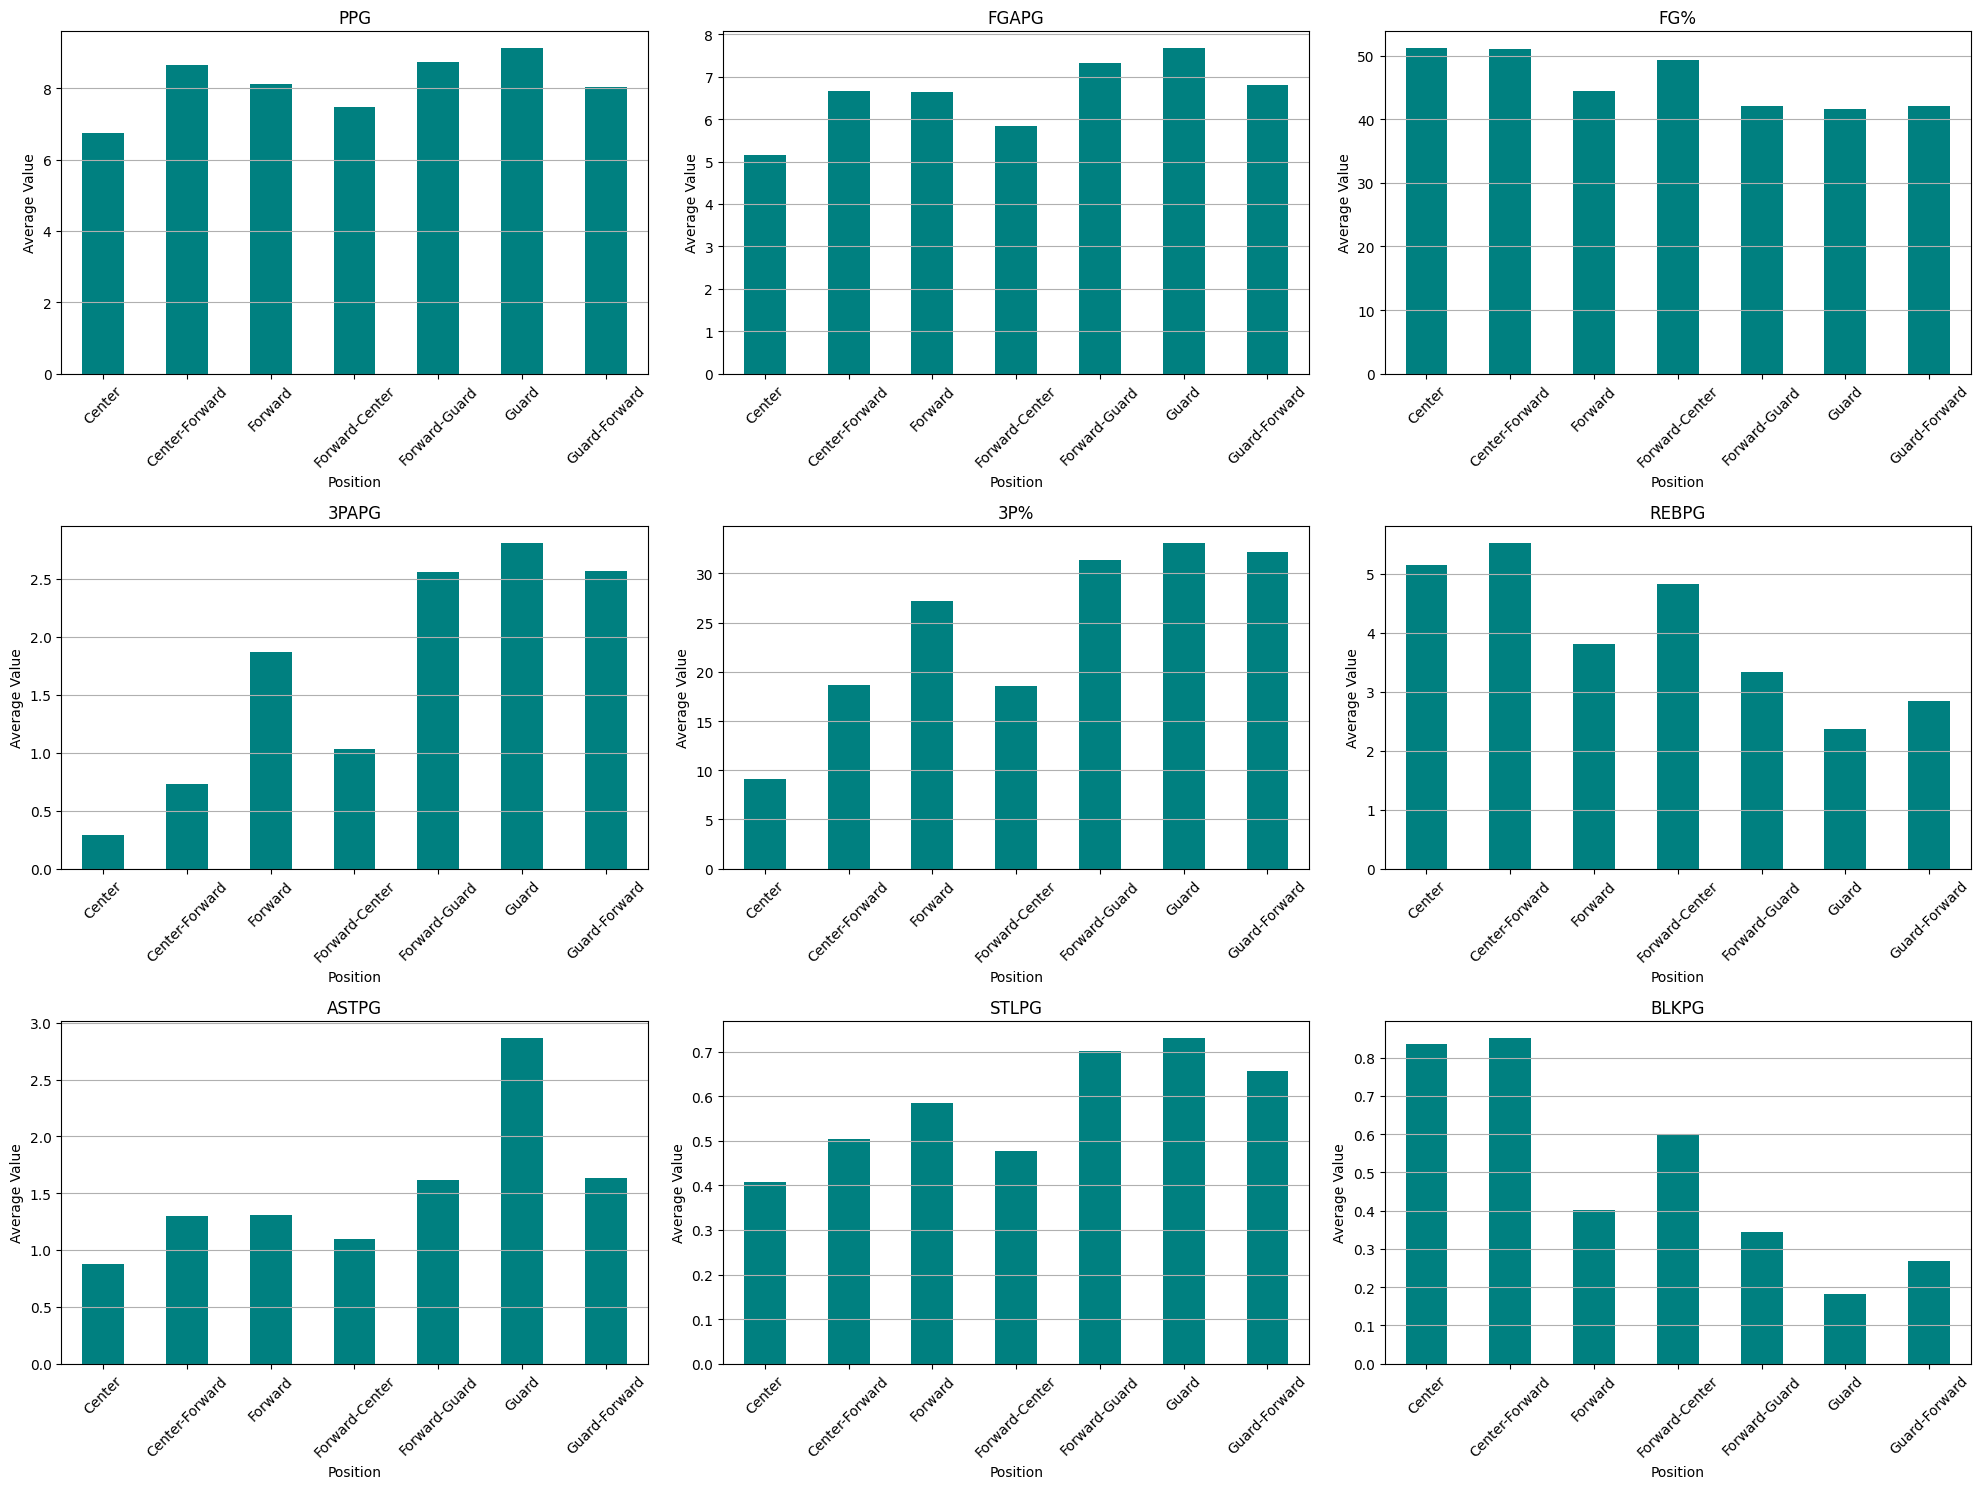

In [27]:
"""
Here we look at the attributes for different positions
"""
# Recalculating the average values for the selected attributes by position
selected_columns = ['PPG','FGAPG','FG%','3PAPG','3P%', 'REBPG', 'ASTPG', 'STLPG', 'BLKPG']
avg_selected_attributes_by_position = data_recent.groupby('position')[selected_columns].mean()

# Plotting bar charts for each attribute by position
plt.figure(figsize=(20, 15))

for i, column in enumerate(selected_columns, 1):
    plt.subplot(3, 3, i)
    avg_selected_attributes_by_position[column].plot(kind='bar', color='teal')
    plt.title(column)
    plt.ylabel('Average Value')
    plt.xlabel('Position')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()


As expected, the guards have higher points per game, this is due to higher field goal attemps. Centers have higher field goal percentage because they attack closer to the rim. The shooting is more obvious when we look at 3 point data, guards have a average of 32% while center have much lower percentage. Free throws are basically the same. Taller players definitely grab more rebounds and get more blocks. Guards have higher assists and steals as well.

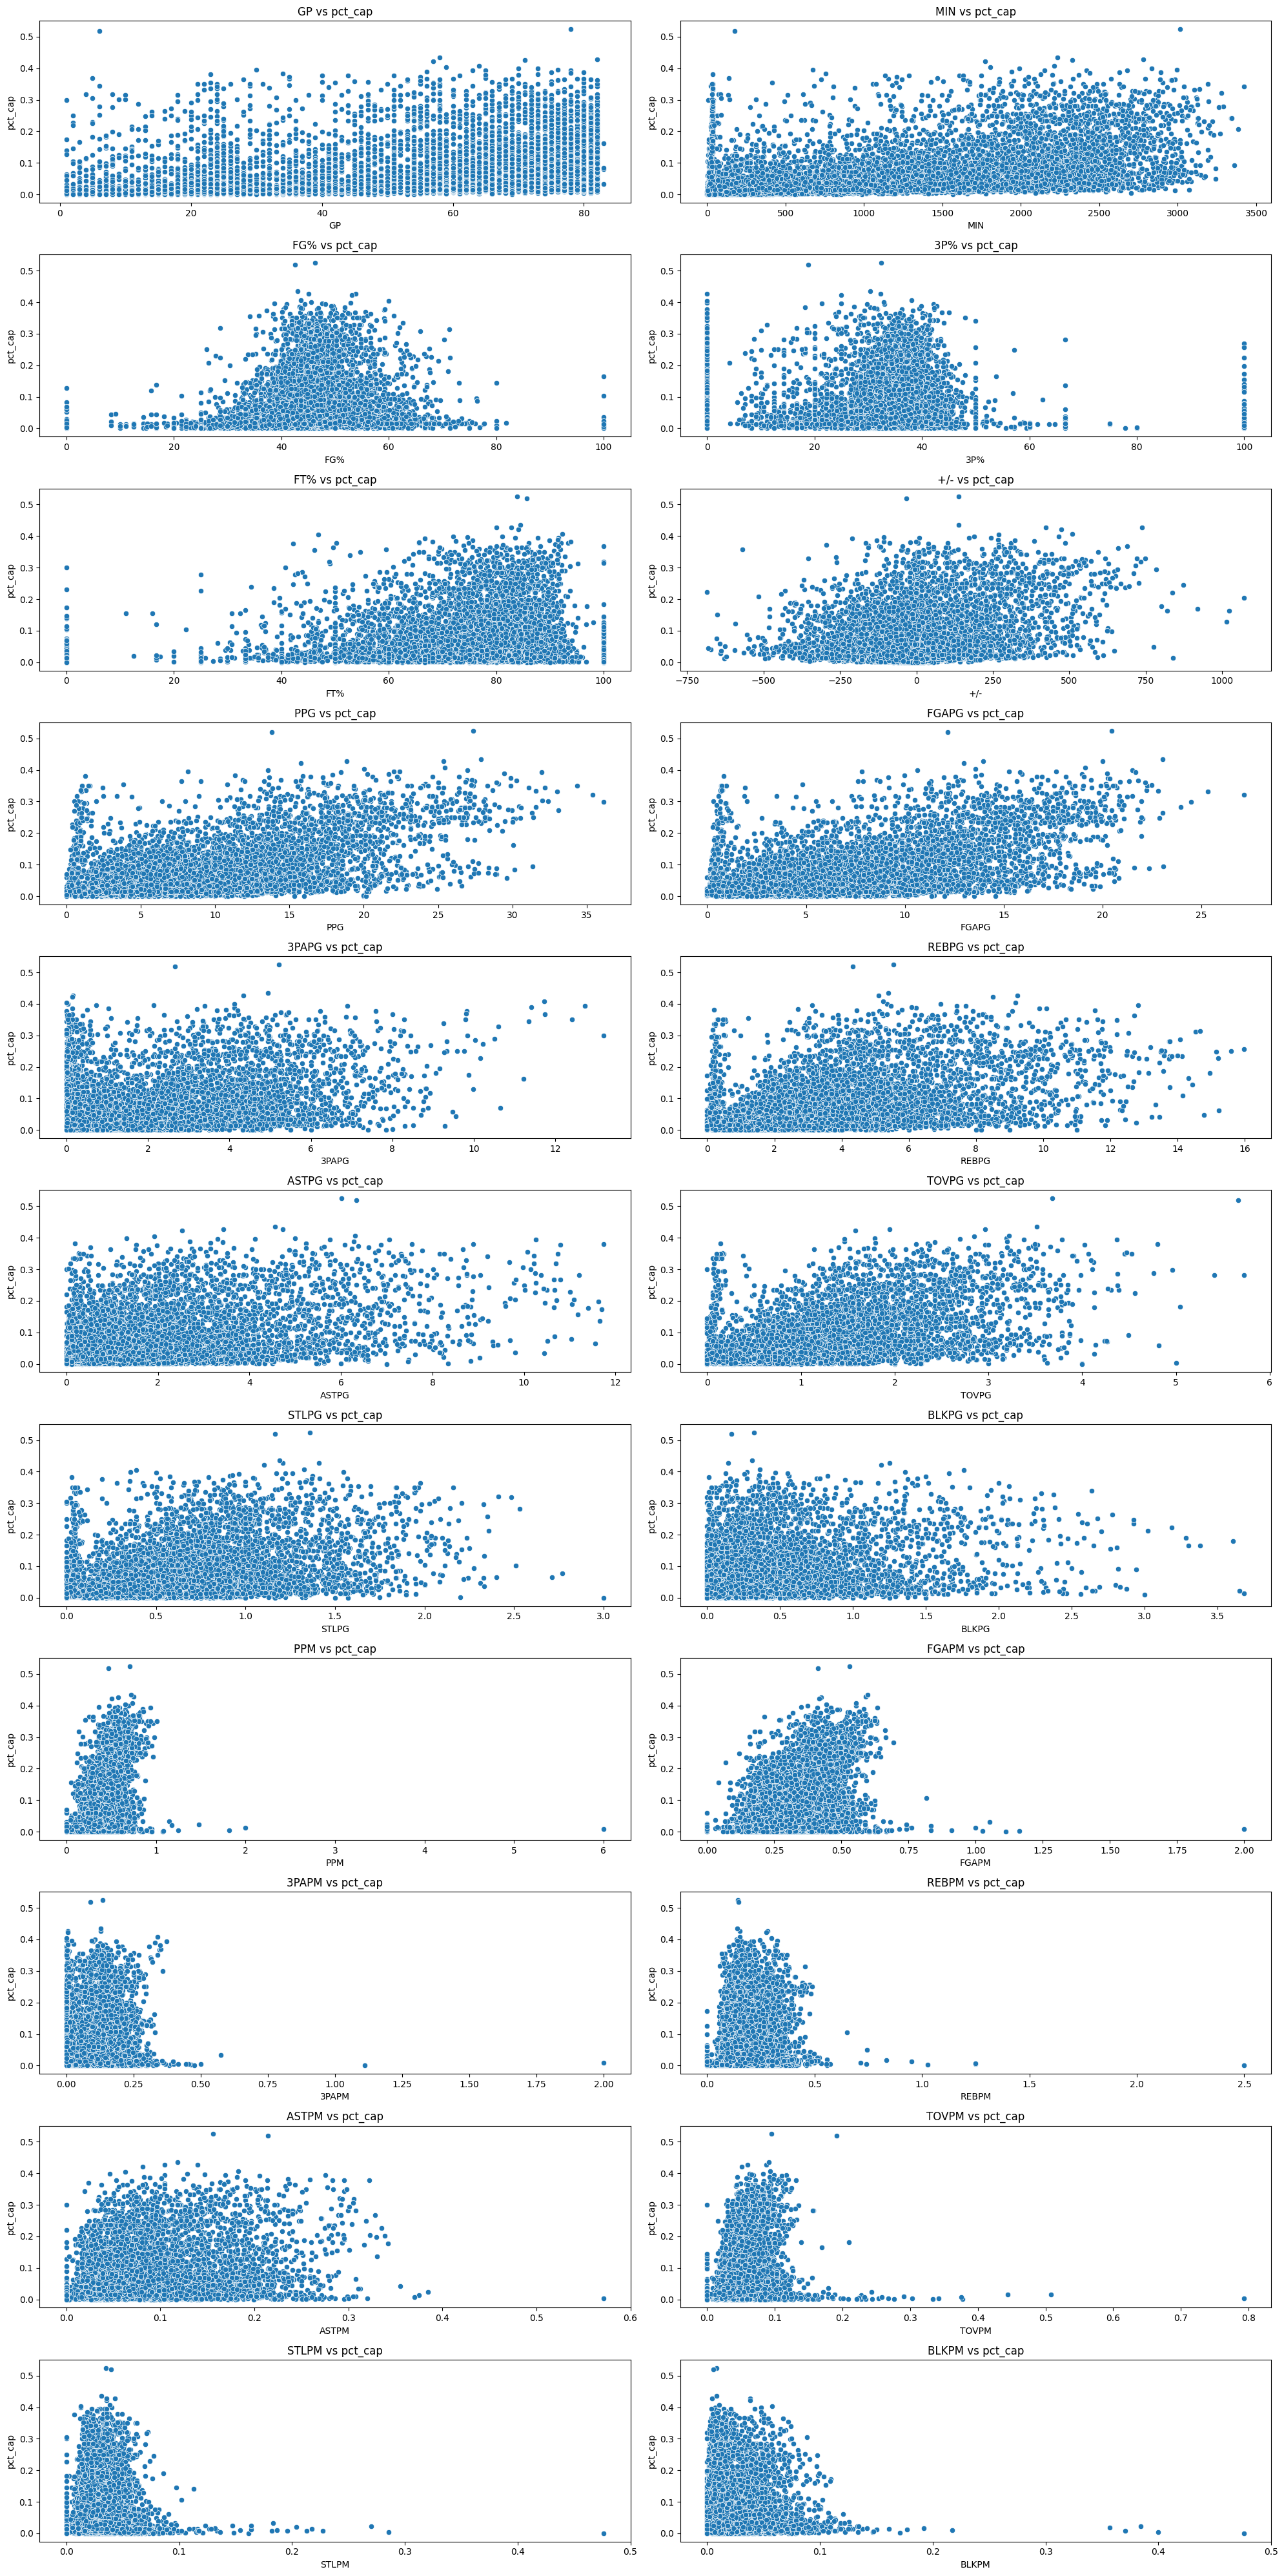

In [28]:
"""
Here I want to look at the correlation between different attributes and pct_cap which is a proxy for salary.
"""
# List of attributes to plot against pct_cap
attributes = ['GP', 'MIN', 'FG%', '3P%', 'FT%', '+/-','PPG', 'FGAPG', '3PAPG', 'REBPG', 'ASTPG', 'TOVPG', 'STLPG', 
              'BLKPG','PPM', 'FGAPM', '3PAPM', 'REBPM', 'ASTPM', 'TOVPM', 'STLPM', 'BLKPM']

# Plotting scatter plots for each attribute against pct_cap
plt.figure(figsize=(20, 40))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(11, 2, i)
    sns.scatterplot(x=data_recent[attribute], y=data_recent['pct_cap'])
    plt.title(f'{attribute} vs pct_cap')
    plt.xlabel(attribute)
    plt.ylabel('pct_cap')

plt.tight_layout()
plt.show()


[Games played]&[Minutes] players that played more games and more minutes earned more on average. This says a lot about a player's mentality, commitment to the games as well as health conditions.  
[Shooting percentage]: FG% is the overall level of scoring efficiency, too low is simply not good, evident in low salary, too high is probably of very few shot attempts. There is a slight positive correlation.   
[+/-] This is a good indicator because a quite obvious positive relation is there.  
[PPG]: a great indicator, possibily the most appearent.  
[Attempt]: reflects both minutes played and overall strategic value.3 point is something only for elite players or shooters.  
[Rebound]: reflects the player's defensive value, positively correlated with salary  
[Assist] is not a good indicator because assists are quite random and depend on luck  
[Turnover] surprisingly has a positive correlation. This is possibily due to the ball power given to elite players who make mistakes due to higher than average defensive pressure.  


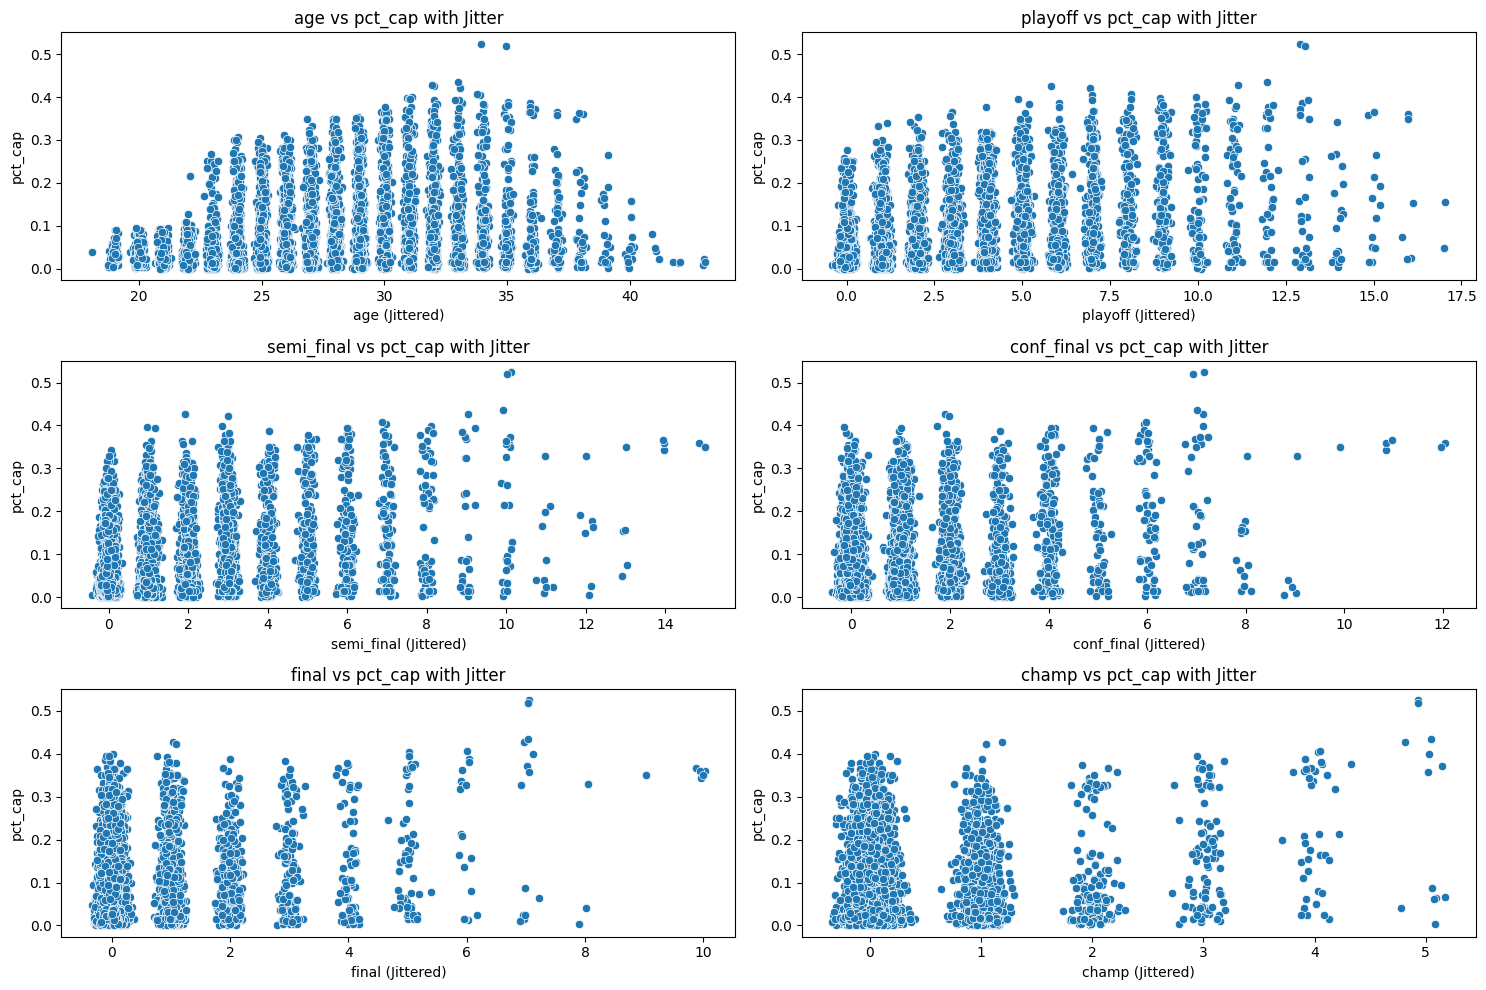

In [29]:

# Define the attributes to plot against pct_cap
attributes = ['age', 'playoff', 'semi_final', 'conf_final', 'final', 'champ']

# Adding a small amount of random jitter to the categorical attributes
jittered_data = {attr: data_recent[attr] + np.random.normal(0, 0.1, size=len(data_recent)) for attr in attributes}

# Creating scatter plots with jitter
plt.figure(figsize=(15, 10))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=jittered_data[attribute], y=data_recent['pct_cap'])
    plt.title(f'{attribute} vs pct_cap with Jitter')
    plt.xlabel(f'{attribute} (Jittered)')
    plt.ylabel('pct_cap')

plt.tight_layout()
plt.show()


Here we look at discrete indicators with few data points. The data points are stacked up on each other, so I applied the jitter method to try to see the distribution within each column.  
[age]: players can sign max contracts starting from 23 years old, and and sign higher max contracts as their experience grow. I believe age will be a poor indicator because of the 2005 changes to salary composition. Before seniority was a big deal, but now it's not.
[playoff]: players with more playoff experience have on average higher pay.But I would assume the effect caps off after a certain number.
The same goes for other matrics that track experience in the playoffs.

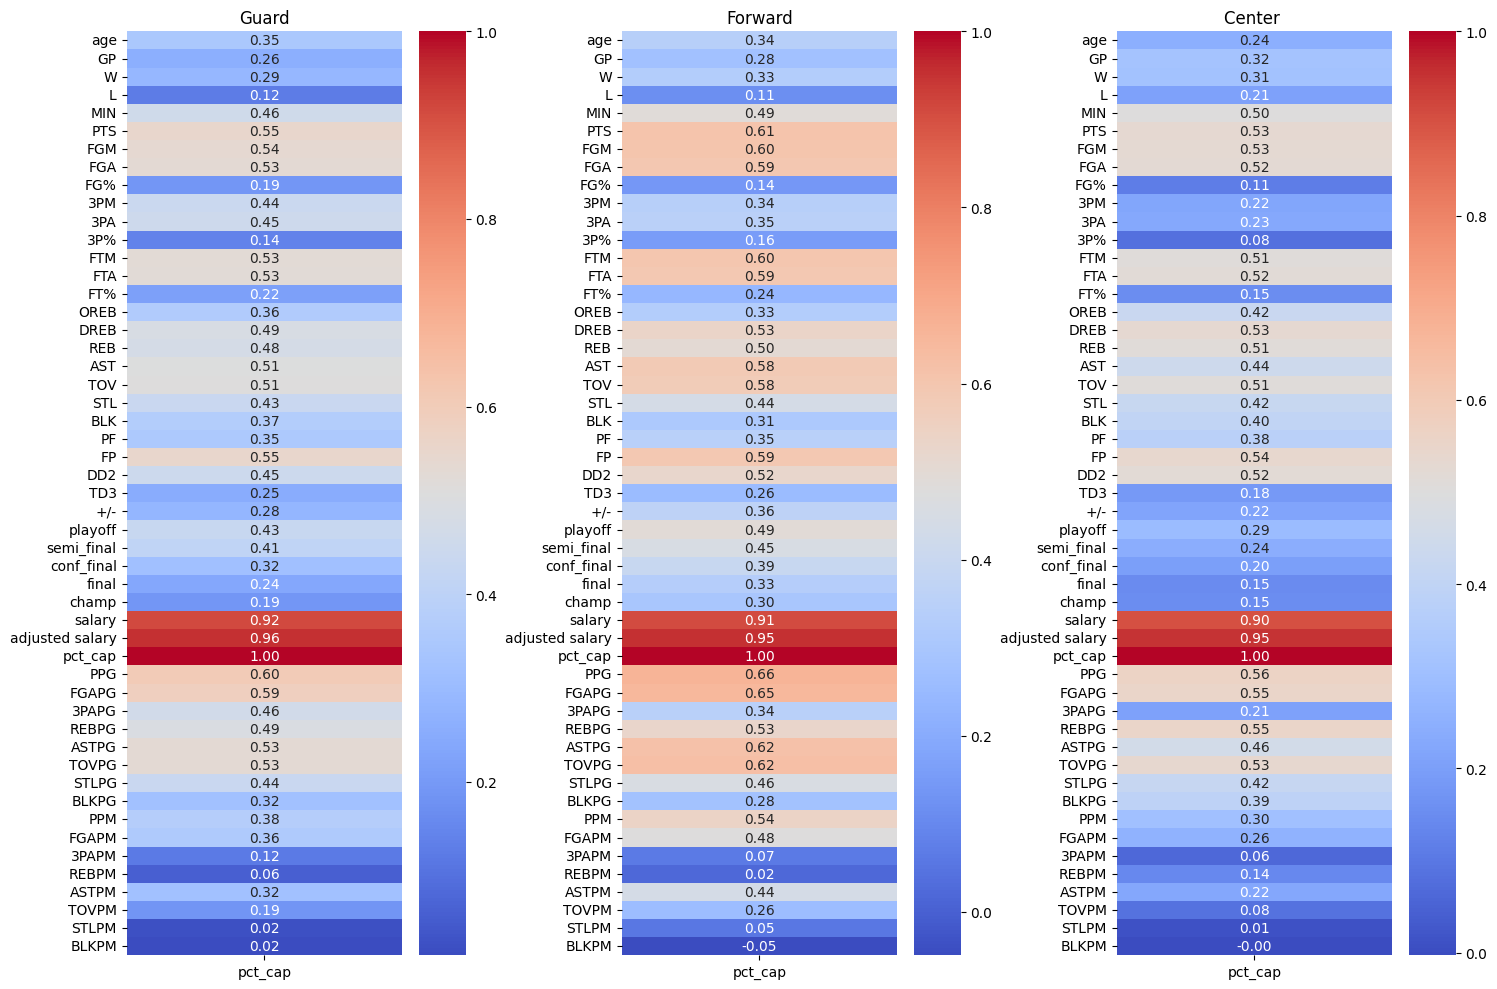

In [30]:
"""
Here I will split the dataset into 3 subsets based on position, because I believe different positions have different valuation metrics.
"""
guard_set = data_recent[data_recent['position'] == 'Guard']
forward_set = data_recent[(data_recent['position'] == 'Forward') + (data_recent['position'] == 'Forward-Guard')]
center_set = data_recent[(data_recent['position'] == 'Center') + (data_recent['position'] == 'Forward-Center') ]


"""
Next I want to see the correlation between the attributes to each subset.Starting with guards
"""
# List of attributes
attributes = ['age', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-',
       'playoff', 'semi_final', 'conf_final', 'final', 'champ',
       'salary', 'adjusted salary', 'pct_cap', 'PPG', 'FGAPG', '3PAPG',
       'REBPG', 'ASTPG', 'TOVPG', 'STLPG', 'BLKPG','PPM', 'FGAPM', '3PAPM',
        'REBPM', 'ASTPM', 'TOVPM', 'STLPM', 'BLKPM']

# Calculating the correlation matrices and isolating the correlations with pct_cap for each position
correlation_matrix_guard = guard_set[attributes].corr()
correlation_matrix_forward = forward_set[attributes].corr()
correlation_matrix_center = center_set[attributes].corr()

# Generate the correlation with pct_cap only
correlations_with_pct_cap_guard = correlation_matrix_guard[['pct_cap']]
correlations_with_pct_cap_forward = correlation_matrix_forward[['pct_cap']]
correlations_with_pct_cap_center = correlation_matrix_center[['pct_cap']]

# Creating the heatmaps for each position
plt.figure(figsize=(15, 10))

# Guard
plt.subplot(1, 3,1)
sns.heatmap(correlations_with_pct_cap_guard, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Guard')

# Forward
plt.subplot(1, 3, 2)
sns.heatmap(correlations_with_pct_cap_forward, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Forward')

# Center
plt.subplot(1, 3, 3)
sns.heatmap(correlations_with_pct_cap_center, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Center ')



plt.tight_layout()
plt.show()



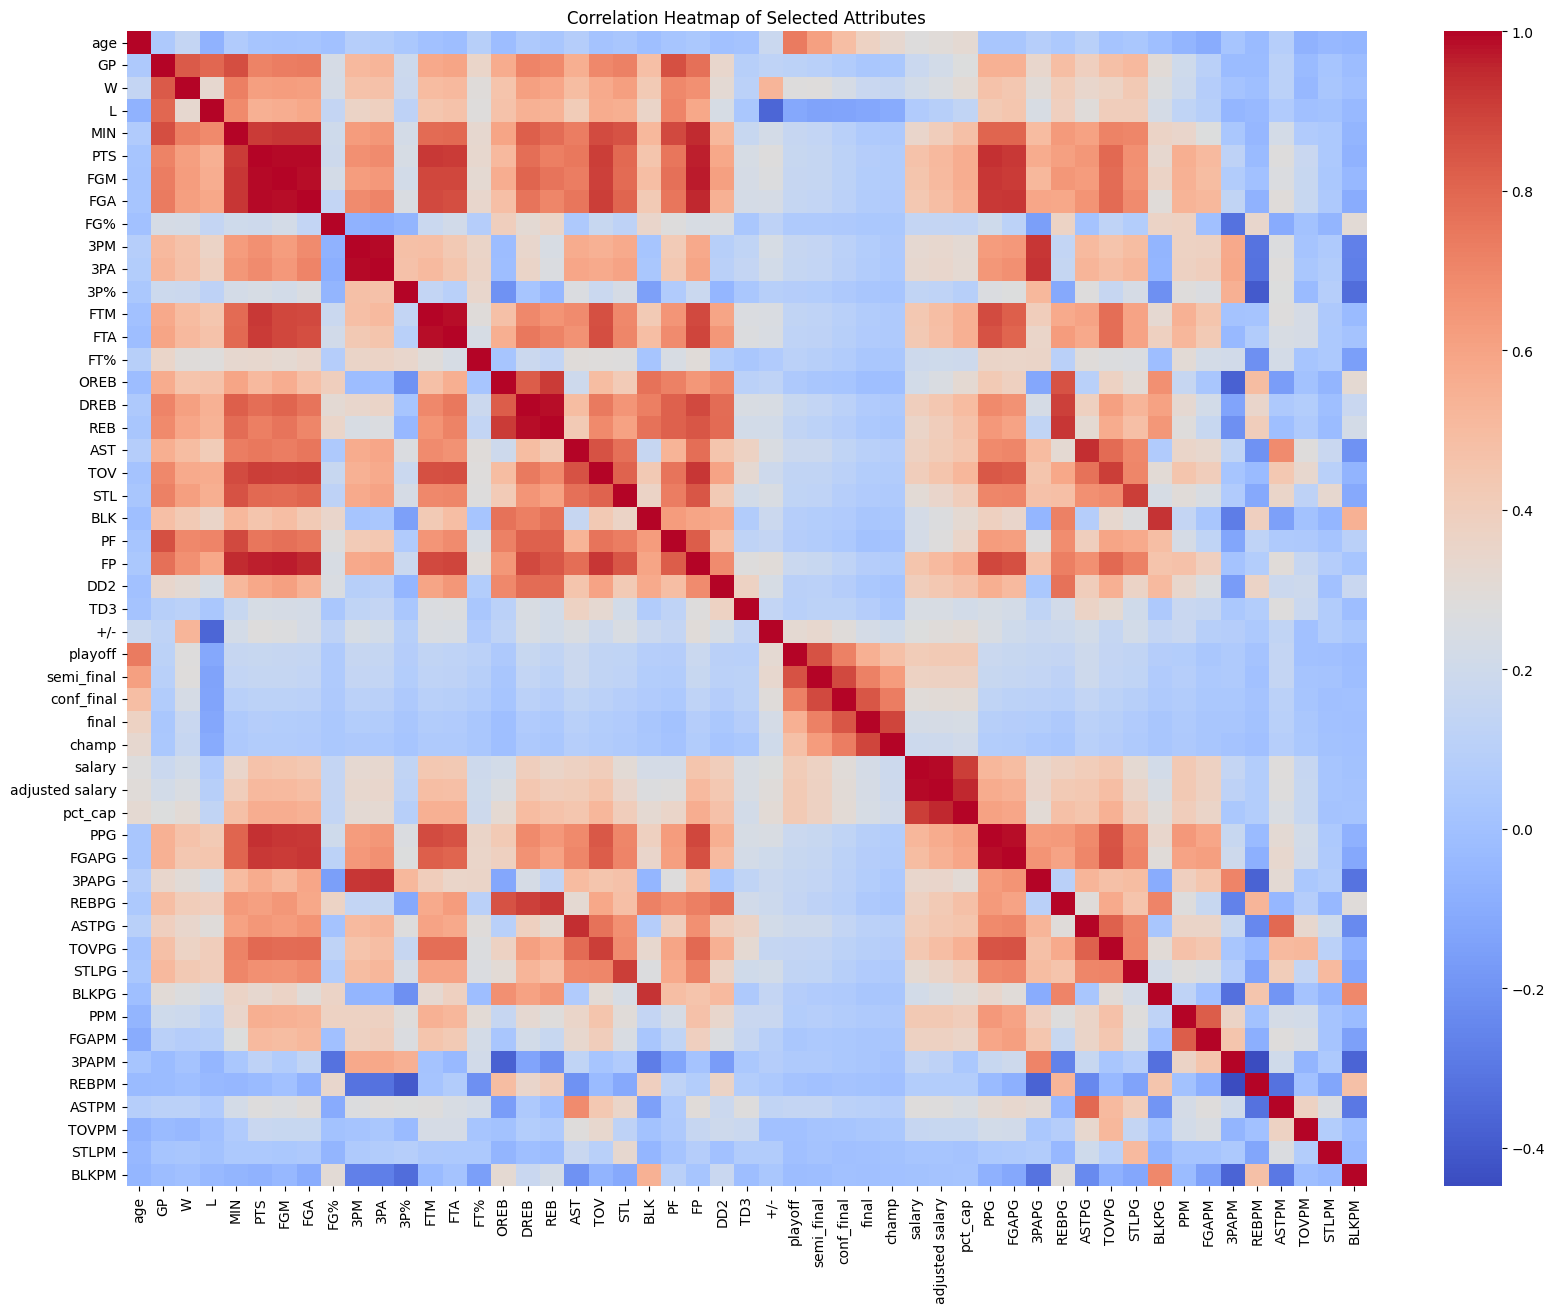

In [31]:
# Redefining the list of attributes for the correlation analysis
attributes_for_correlation = ['age', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM',
                              'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
                              'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-',
                              'playoff', 'semi_final', 'conf_final', 'final', 'champ',
                              'salary', 'adjusted salary', 'pct_cap', 'PPG', 'FGAPG', '3PAPG',
                              'REBPG', 'ASTPG', 'TOVPG', 'STLPG', 'BLKPG','PPM', 'FGAPM', '3PAPM',
                              'REBPM', 'ASTPM', 'TOVPM', 'STLPM', 'BLKPM']

# Calculating the correlation matrix for the specified attributes
correlation_matrix = data_recent[attributes_for_correlation].corr()

# Creating the heatmap for the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Attributes')
plt.show()


This correlation map provide guidance to multicollinearity.
For example, although both “points per game” and “field goal attempt per game” are promising, we should only choose one because these two are highly correlated. 

# Regression analysis

I am going to use forward selection to build the regression model, starting with attributes that has the highest correlation with pct_cap. If a new attribute has high correlation with existing attributes, it will be set aside for later where other regression models will be used to deal with multicollinearity.

In [32]:
# Including 'FGAPG' as an additional independent variable
X = guard_set[['age', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM',
                              'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
                              'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-',
                              'playoff', 'semi_final', 'conf_final', 'final', 'champ', 'PPG', 'FGAPG', '3PAPG',
                              'REBPG', 'ASTPG', 'TOVPG', 'STLPG', 'BLKPG','PPM', 'FGAPM', '3PAPM',
                              'REBPM', 'ASTPM', 'TOVPM', 'STLPM', 'BLKPM']]  # Independent variable
y = guard_set['pct_cap']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Creating and training the regression model using statsmodels
model = sm.OLS(y, X).fit()

# Displaying the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                pct_cap   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     74.91
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:22:35   Log-Likelihood:                 4587.1
No. Observations:                2990   AIC:                            -9078.
Df Residuals:                    2942   BIC:                            -8790.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0996      0.015     -6.765      0.0

In [33]:
# Considering 'pct_cap' as the dependent variable and 'PPG' as the independent variable in the guard set
X = guard_set[['PPG']]  # Independent variable
y = guard_set['pct_cap']  # Dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating the regression model
regressor = LinearRegression()

# Training the model using the training sets
regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = regressor.predict(X_test)

# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mse, r2)


(0.0036890578613312432, 0.3970002584710183)

In [34]:
# Considering 'pct_cap' as the dependent variable and 'PPG' as the independent variable in the guard set
X = guard_set[['age','playoff', 'semi_final', 'conf_final', 'final','PPG', 'REBPG', 'ASTPG', 'BLKPG']]  # Independent variable
y = guard_set['pct_cap']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating the regression model
regressor = LinearRegression()

# Training the model using the training sets
regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = regressor.predict(X_test)

# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mse, r2)


(0.0028801605131540753, 0.5292196245555325)

In [35]:
# Considering 'pct_cap' as the dependent variable and 'PPG' as the independent variable in the guard set
X = guard_set[['age', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM',
                              'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
                              'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-',
                              'playoff', 'semi_final', 'conf_final', 'final', 'champ', 'PPG', 'FGAPG', '3PAPG',
                              'REBPG', 'ASTPG', 'TOVPG', 'STLPG', 'BLKPG','PPM', 'FGAPM', '3PAPM',
                              'REBPM', 'ASTPM', 'TOVPM', 'STLPM', 'BLKPM']] 
y = guard_set['pct_cap']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating the regression model
regressor = LinearRegression()

# Training the model using the training sets
regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = regressor.predict(X_test)

# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mse, r2)


(0.0026130696299686783, 0.572877311580106)

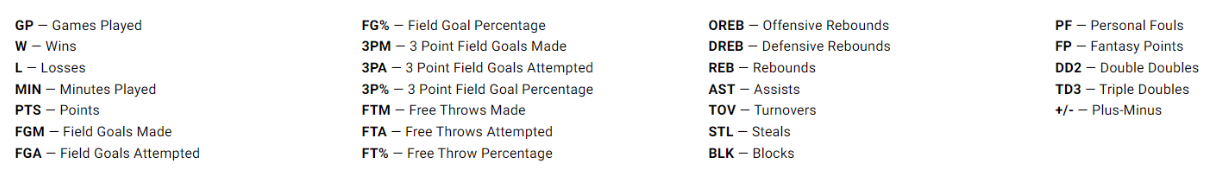

##### playoff: Represents the number of years the player has participated in playoffs up until a specific season.
##### semi_final: Indicates the number of years the player has reached the semi-final stage in tournaments or leagues up until a specific season.
##### conf_final: Denotes the number of years the player has participated in conference final games up until a specific season.
##### final: Refers to the number of years the player has reached the final games of a tournament or league up until a specific season.
##### champ: Reflects the number of years the player was part of a championship-winning team up until a specific season.
##### PPG (Points Per Game): The average number of points scored by the player per game.
##### FGAPG (Field Goal Attempts Per Game): The average number of field goal attempts by the player per game.
##### 3PAPG (Three-Point Attempts Per Game): The average number of three-point attempts by the player per game.
##### REBPG (Rebounds Per Game): The average number of rebounds secured by the player per game.
##### ASTPG (Assists Per Game): The average number of assists made by the player per game.
##### TOVPG (Turnovers Per Game): The average number of times the player turns over the ball per game.
##### STLPG (Steals Per Game): The average number of steals by the player per game.
##### BLKPG (Blocks Per Game): The average number of blocks made by the player per game.
##### PPM (Points Per Minute): The average number of points scored by the player per minute of play.
##### FGAPM (Field Goal Attempts Per Minute): The average number of field goal attempts by the player per minute of play.
##### 3PAPM (Three-Point Attempts Per Minute): The average number of three-point attempts by the player per minute of play.
##### REBPM (Rebounds Per Minute): The average number of rebounds secured by the player per minute of play.
##### ASTPM (Assists Per Minute): The average number of assists made by the player per minute of play.
##### TOVPM (Turnovers Per Minute): The average number of times the player turns over the ball per minute of play.
##### STLPM (Steals Per Minute): The average number of steals by the player per minute of play.
##### BLKPM (Blocks Per Minute): The average number of blocks made by the player per minute of play.


In [36]:
data_recent[data_recent['player'] == 'Stephen Curry']

player  season team  age  GP   W   L     MIN     PTS    FGM  ...  \
8752  Stephen Curry    2010  GSW   22  80  25  55  2896.2  1399.0  528.0  ...   
8753  Stephen Curry    2011  GSW   23  74  33  41  2489.0  1373.0  505.0  ...   
8754  Stephen Curry    2012  GSW   24  26  13  13   731.9   383.0  145.0  ...   
8755  Stephen Curry    2013  GSW   25  78  45  33  2982.6  1786.0  626.0  ...   
8756  Stephen Curry    2014  GSW   26  78  50  28  2845.9  1873.0  652.0  ...   
8757  Stephen Curry    2015  GSW   27  80  67  13  2613.2  1900.0  653.0  ...   
8758  Stephen Curry    2016  GSW   28  79  71   8  2700.0  2375.0  805.0  ...   
8759  Stephen Curry    2017  GSW   29  79  65  14  2638.6  1999.0  675.0  ...   
8760  Stephen Curry    2018  GSW   30  51  41  10  1630.8  1346.0  428.0  ...   
8761  Stephen Curry    2019  GSW   31  69  52  17  2331.2  1881.0  632.0  ...   
8762  Stephen Curry    2020  GSW   32   5   1   4   139.3   104.0   33.0  ...   
8763  Stephen Curry    2021  GSW   33  63  37  26  2151.5  2015.0  658.0  ...   
8764  Stephen Curry    2022  GSW   34  64  45  19  2211.1  1630.0  535.0  ...   
8765  Stephen Curry    2023  GSW   35  56  30  26  1941.2  1648.0  559.0  ...   
8766  Stephen Curry    2024  GSW   35  23  11  12    33.8    29.0    9.0  ...   

         STLPG     BLKPG       PPM     FGAPM     3PAPM     REBPM     ASTPM  \
8752  1.900000  0.237500  0.483047  0.394655  0.131206  0.122920  0.162972   
8753  1.472973  0.270270  0.551627  0.423061  0.137405  0.114906  0.173564   
8754  1.500000  0.307692  0.523296  0.404427  0.165323  0.120235  0.188550   
8755  1.615385  0.153846  0.598806  0.465366  0.201167  0.105277  0.180715   
8756  1.641026  0.179487  0.658140  0.485962  0.216100  0.117362  0.234021   
8757  2.037500  0.200000  0.727078  0.513164  0.247206  0.130491  0.236874   
8758  2.139241  0.189873  0.879630  0.591852  0.328148  0.159259  0.195185   
8759  1.797468  0.215190  0.757599  0.546881  0.299022  0.133783  0.198590   
8760  1.568627  0.156863  0.825362  0.529801  0.307211  0.160044  0.190091   
8761  1.333333  0.362319  0.806881  0.574811  0.347461  0.158288  0.154856   
8762  1.000000  0.400000  0.746590  0.588658  0.351759  0.186648  0.236899   
8763  1.222222  0.126984  0.936556  0.634441  0.372298  0.160353  0.168719   
8764  1.328125  0.359375  0.737190  0.553571  0.339198  0.151508  0.182714   
8765  0.928571  0.357143  0.848959  0.583660  0.329178  0.175665  0.181331   
8766  0.030435  0.013043  0.857988  0.565089  0.349112  0.144970  0.124260   

         TOVPM     STLPM     BLKPM  
8752  0.083903  0.052483  0.006560  
8753  0.090800  0.043793  0.008035  
8754  0.088810  0.053286  0.010930  
8755  0.080467  0.042245  0.004023  
8756  0.103307  0.044977  0.004919  
8757  0.095285  0.062376  0.006123  
8758  0.097037  0.062593  0.005556  
8759  0.090578  0.053816  0.006443  
8760  0.093819  0.049056  0.004906  
8761  0.082361  0.039465  0.010724  
8762  0.114860  0.035894  0.014358  
8763  0.099001  0.035789  0.003718  
8764  0.093166  0.038442  0.010402  
8765  0.092211  0.026788  0.010303  
8766  0.097633  0.020710  0.008876  

[15 rows x 55 columns]

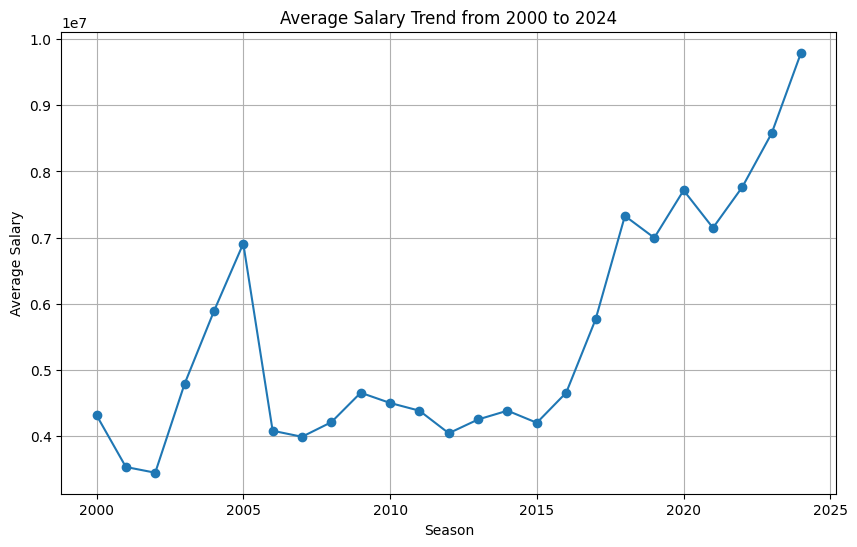

In [37]:
data_filtered = data[(data['season'] >= 2000) & (data['season'] <= 2024)]

# Group by the 'season' and calculate the average salary for each season
average_salary_by_season = data_filtered.groupby('season')['salary'].mean()

# Creating the graph to show the trend of average salary from 2000 to 2024
plt.figure(figsize=(10, 6))
average_salary_by_season.plot(kind='line', marker='o')
plt.title('Average Salary Trend from 2000 to 2024')
plt.xlabel('Season')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

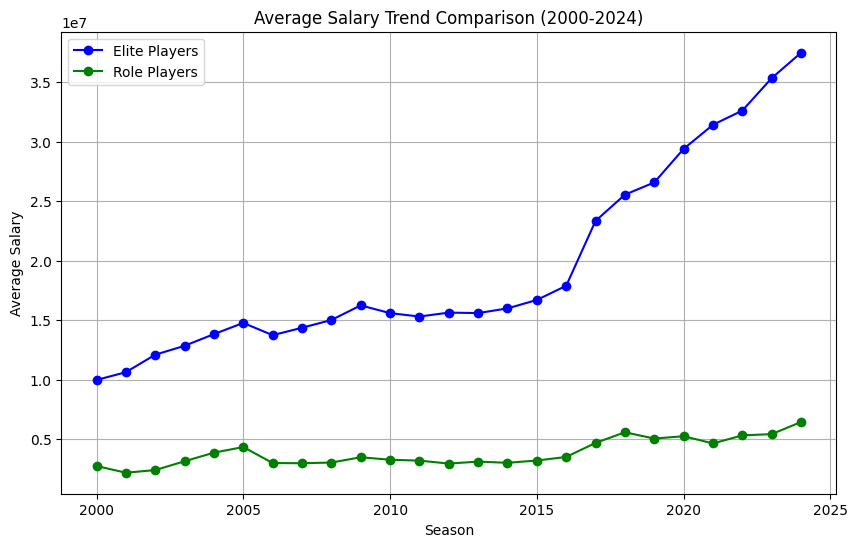

In [38]:
# Separating the dataset into elite players and role players based on 'pct_cap'
elite_players = data_filtered[data_filtered['pct_cap'] >= 0.2]
role_players = data_filtered[data_filtered['pct_cap'] < 0.2]

# Grouping by season and calculating the average salary for elite and role players
average_salary_by_season_elite = elite_players.groupby('season')['salary'].mean()
average_salary_by_season_role = role_players.groupby('season')['salary'].mean()

# Creating a combined graph for both elite players and role players
plt.figure(figsize=(10, 6))

# Plotting average salary trends for elite players
average_salary_by_season_elite.plot(kind='line', marker='o', color='blue', label='Elite Players')

# Plotting average salary trends for role players
average_salary_by_season_role.plot(kind='line', marker='o', color='green', label='Role Players')

# Adding titles and labels
plt.title('Average Salary Trend Comparison (2000-2024)')
plt.xlabel('Season')
plt.ylabel('Average Salary')
plt.legend()
plt.grid(True)

plt.show()
